#### Installing the Necessary Libraries

In [25]:
# !pip install tensorflow
# !pip install matplotlib

#### Importing the necessary libraries

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

#### Importing the dataset

Importing the fashion mnist dataset which is an alternative to the numbers mnist dataset

In [27]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

#### Extracting the training and testing datasets from the fashion mnist dataset

In [28]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

#### Seperating the training set into training and validation datasets

In [29]:
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [30]:
X_train.shape, y_train.shape

((55000, 28, 28), (55000,))

In [31]:
X_valid.shape, y_valid.shape

((5000, 28, 28), (5000,))

#### Actual Classnames represented by name and index in array

In [32]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

#### Visualizing the pixel data in images

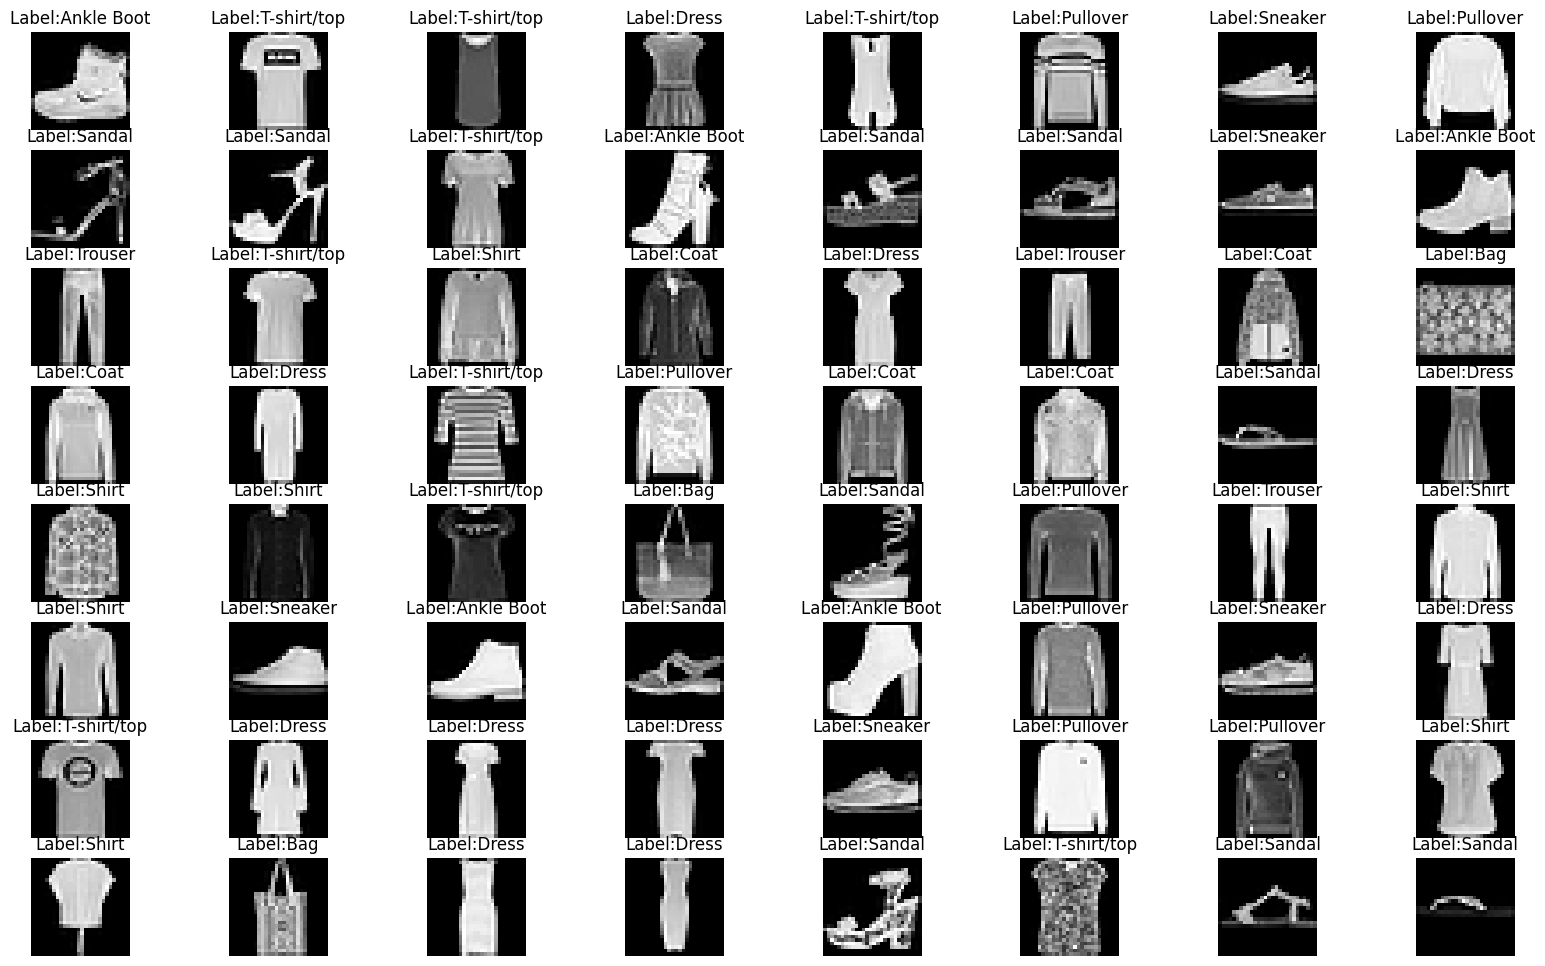

In [33]:
num_images = 64
factor = int(np.sqrt(num_images))
fig,ax = plt.subplots(nrows=factor, ncols=factor, figsize=(20,12))
idx_offset = 0 # take "num_images" starting from the index "idx_offset"
for i in range(factor):
    index = idx_offset+i*(factor)
    for j in range(factor):
        ax[i,j].imshow(X_train_full[index+j],cmap='gray')
        ax[i,j].set_title('Label:{0}'.format(str(class_names[y_train_full[index+j]])))
        ax[i,j].set_axis_off()

#### Normalizing the pixel data

Pixel values are ranging from 0 to 255. Dividing by 255 will result the values to lie from 0.0 to 1.0.

In [34]:
X_train, X_valid, X_test = X_train/255, X_valid/255, X_test/255

#### Visualizing the pixel values of the first image

In [35]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

#### Image plot of the first image

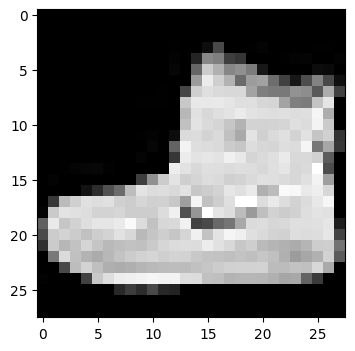

In [36]:
plt.figure(figsize=(4,4))
plt.imshow(X_train[0].reshape(28,28),cmap='gray')
plt.show()

In [37]:
class_names[y_train[0]]

'Ankle Boot'

#### Model Building

- Sequential Model : Simplest kind of keras model for neural networks that are just composed of a single stack of layers connected sequentially.
- First Layer (Input Layer) : Specify the input shape, which doesn't include the batch size only the shape of the instances. Keras needs to know the shape of the inputs so it can determine the shape of the connection weight matrix of the first hidden layer.
- Flattern Layer : Role is convert each input image to 1D array. Recieves a batch of shape [32, 28, 28], will reshape it to [32, 784].
- Dense Hidden Layer : 300 neurons and will use the ReLU activation function. Each dense layer manages it's own weight matrix containing all the connection weights between the neurons and their inputs. It also manages a vector of bias terms (one per neuron).
- Dense Hidden Layer : 100 neurons with ReLU activation function.
- Dense Output Layer : 10 neurons (one per class) using the softmax activation function because the classes are exclusive.

In [38]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

2024-11-19 22:51:49.145414: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [39]:
"""
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')])
"""

"\nmodel = tf.keras.Sequential([\n    tf.keras.layers.Flatten(input_shape=[28, 28]),\n    tf.keras.layers.Dense(300, activation='relu'),\n    tf.keras.layers.Dense(100, activation='relu'),\n    tf.keras.layers.Dense(10, activation='softmax')])\n"

In [40]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

#### Inspecting the model layers

In [42]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [43]:
hidden1 = model.layers[1]

In [44]:
hidden1.name

'dense'

In [45]:
model.get_layer('dense') is hidden1

True

#### Weights and biases of the first hidden layer

In [46]:
weights, biases = hidden1.get_weights()
weights, weights.shape

(array([[-0.06174467,  0.00136631, -0.00458926, ..., -0.02218592,
         -0.05540018,  0.01706963],
        [-0.01772485,  0.06739265, -0.05860752, ...,  0.04124127,
          0.00802088, -0.02619709],
        [-0.0175525 ,  0.01896753, -0.02102911, ...,  0.05805399,
         -0.00629631, -0.01752633],
        ...,
        [ 0.05329123, -0.03537329,  0.04880107, ..., -0.00063659,
          0.02894461,  0.02290244],
        [ 0.04168116,  0.06314105, -0.02075434, ..., -0.04146532,
         -0.04206529,  0.03249374],
        [-0.06970996, -0.03089734, -0.05079816, ...,  0.04138362,
         -0.04707992, -0.0712704 ]], dtype=float32),
 (784, 300))

In [47]:
biases, biases.shape

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 

#### Model Compilation using appropriate metrics

In [32]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

#### Model fitting step

In [33]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30


2024-11-03 21:40:55.964101: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 172480000 exceeds 10% of free system memory.


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6777 - loss: 1.0218 - val_accuracy: 0.8212 - val_loss: 0.5101
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8278 - loss: 0.5044 - val_accuracy: 0.8338 - val_loss: 0.4601
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8441 - loss: 0.4488 - val_accuracy: 0.8400 - val_loss: 0.4371
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8529 - loss: 0.4183 - val_accuracy: 0.8440 - val_loss: 0.4215
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8591 - loss: 0.3966 - val_accuracy: 0.8484 - val_loss: 0.4108
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8657 - loss: 0.3797 - val_accuracy: 0.8504 - val_loss: 0.4017
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8702 - loss: 0.3653 - val_accuracy: 0.8528 - val_loss: 0.3931
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8754 - loss: 0.3531 - val_accurac

#### Plot of Testing set Accuracy, Validation accuracy, Test loss and Validation set Loss

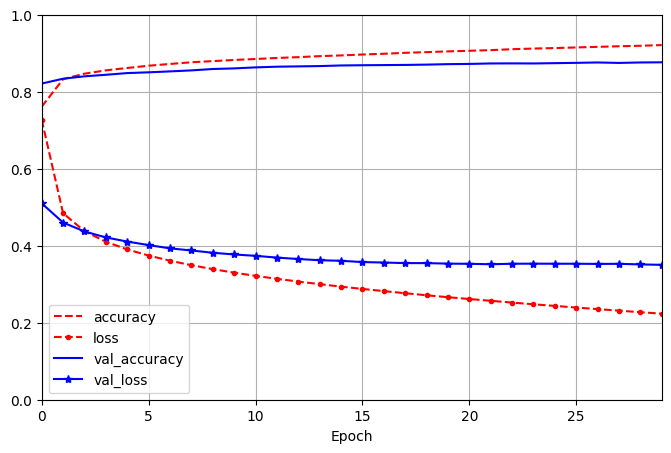

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch", style=["r--", "r--.","b-", "b-*"])
plt.show()

#### Model Prediction and Evaluation

In [37]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - accuracy: 0.8734 - loss: 0.3707


[0.36567622423171997, 0.8747000098228455]

#### Seperate a group of 3 datapoints and predict them seperately using the model probabilities using numpy

In [38]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.22, 0.  , 0.01, 0.  , 0.77],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [39]:
import numpy as np
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1])

In [40]:
np.array(class_names)[y_pred]

array(['Ankle Boot', 'Pullover', 'Trouser'], dtype='<U11')

In [41]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)